In [1]:
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
df = pd.read_csv('TacoBellCustomers.csv')
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8896 entries, 0 to 8895
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       8896 non-null   int64  
 1   ID               8896 non-null   int64  
 2   Gender           8896 non-null   object 
 3   Ever_Married     8896 non-null   object 
 4   Age              8896 non-null   int64  
 5   Graduated        8896 non-null   object 
 6   Profession       8896 non-null   object 
 7   Work_Experience  8896 non-null   float64
 8   Spending_Score   8896 non-null   object 
 9   Family_Size      8896 non-null   float64
 10  State_Purchased  8896 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 764.6+ KB


In [3]:
#wrangling me data
df.drop(['Graduated','Ever_Married',"Work_Experience","ID","Unnamed: 0","Profession",'State_Purchased'],axis=1,inplace=True)

In [4]:
df

,Gender,Age,Spending_Score,Family_Size
0,Female,36,Low,1.0
1,Male,37,Average,4.0
2,Male,59,High,2.0
3,Male,47,High,5.0
4,Male,61,Low,3.0
...,...,...,...,...
8891,Male,41,High,5.0
8892,Male,35,Low,4.0
8893,Female,33,Low,1.0
8894,Female,27,Low,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8896 entries, 0 to 8895
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          8896 non-null   object 
 1   Age             8896 non-null   int64  
 2   Spending_Score  8896 non-null   object 
 3   Family_Size     8896 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 278.1+ KB


In [6]:
#featurazion by turning string objects to binary
for i in range(len(df)):
    if df.iat[i,0] == 'Male':
        df.iat[i,0] = 0
    if df.iat[i,0]=='Female':
        df.iat[i,0] = 1
df['Gender'] = df['Gender'].astype(int)

for i in range(len(df)):
    if df.iat[i,2] == 'Low':
        df.iat[i,2] = 2
    if df.iat[i,2]=='Average':
        df.iat[i,2] = 4
    if df.iat[i,2] == 'High':
        df.iat[i,2] = 5
df['Spending_Score'] = df['Spending_Score'].astype(int)



In [7]:
#normalization
df_min_max_scaled=df.copy()
for column in df_min_max_scaled.columns:
    try:
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
    except:
        pass

<AxesSubplot:>

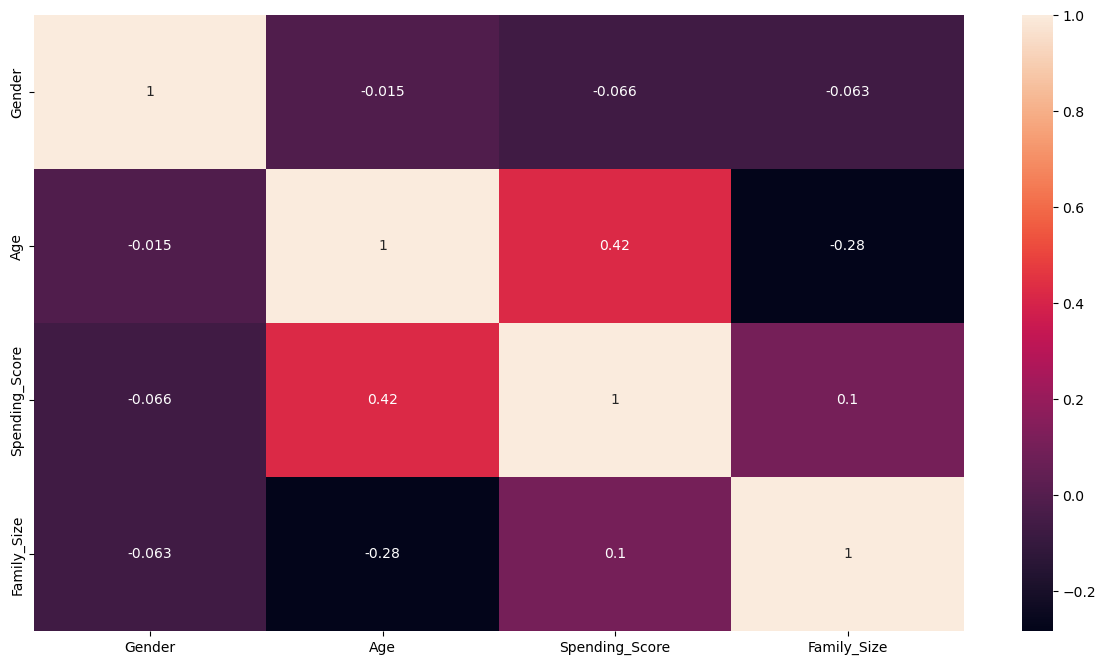

In [8]:
#heatmap
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
cor = df.corr()
fig.set_size_inches(15,8)
sns.heatmap(cor, ax=ax, annot=True)

In [9]:
df_min_max_scaled

,Gender,Age,Spending_Score,Family_Size
0,1.0,0.253521,0.000000,0.000
1,0.0,0.267606,0.666667,0.375
2,0.0,0.577465,1.000000,0.125
3,0.0,0.408451,1.000000,0.500
4,0.0,0.605634,0.000000,0.250
...,...,...,...,...
8891,0.0,0.323944,1.000000,0.500
8892,0.0,0.239437,0.000000,0.375
8893,1.0,0.211268,0.000000,0.000
8894,1.0,0.126761,0.000000,0.375


In [10]:
#test train split
def testTrainSplit(data):
    length = len(df.index)
    split = int(length*0.7)
    train = data[0:split]
    test = data[split+1:length]
    return train, test
train, test = testTrainSplit(df_min_max_scaled)

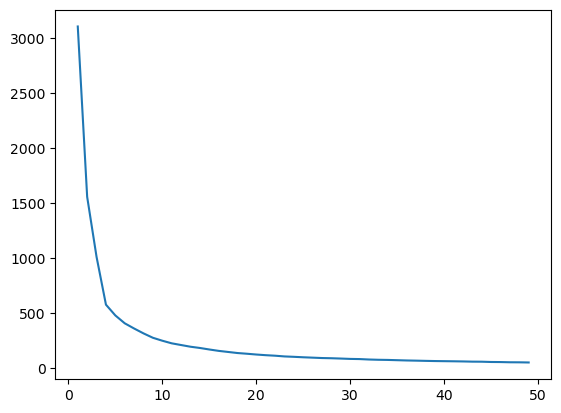

In [22]:
import sklearn
from sklearn.cluster import KMeans
ks=[]
for i in range(1,50):
    ks.append(i)
train = train[['Age', 'Spending_Score','Gender','Family_Size']]
wcss = []

for i in range(1, 50):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(train)
    wcss.append(clustering.inertia_)
sns.lineplot(x = ks, y = wcss);


In [12]:
# sets k equal to 4
K=4

In [15]:
#chooses 4 random values
Centroids = (test.sample(n=K))

In [17]:
#Euclidian distance 
diff = 1
j=0

while(diff!=0):
    XD=test
    i=1
    #finding euclidian distance
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Gender"]-row_d["Gender"])**2
            d2 = (row_c["Age"]-row_d["Age"])**2
            d3 = (row_c["Spending_Score"]-row_d["Spending_Score"])**2
            d4 = (row_c["Family_Size"]-row_d["Family_Size"])**2
            d = sqrt(d1+d2+d3+d4)
            ED.append(d)
        test[i] = ED
        i = i+1
    
    C = []
    for index, row in test.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    test["Cluster"]=C
    Centroids_new = test.groupby(["Cluster"]).mean()[["Age", "Gender","Spending_Score","Family_Size"]]
    #code that resets the and does it again if it doesnt hit 0
    if j == 0:
        diff = 1
        j = j+1
    else:
        #resets and does it again
        diff = (Centroids_new['Age'] - Centroids['Age']).sum() + (Centroids_new['Gender'] - Centroids['Gender']).sum()+(Centroids_new['Spending_Score'] - Centroids['Spending_Score']).sum() + (Centroids_new['Family_Size'] - Centroids['Family_Size']).sum()
        print(diff.sum())
    Centroids = test.groupby(["Cluster"]).mean()[["Age","Gender","Spending_Score","Family_Size"]]

C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i] = ED
C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i] = ED
C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

-0.1994146686041282


C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Cluster"]=C
C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i] = ED


-0.007750083362699778


C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Cluster"]=C
C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i] = ED


-0.0009327331156036289


C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Cluster"]=C
C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i] = ED


0.0008547247249340029


C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Cluster"]=C
C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i] = ED


0.00080783823748036


C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Cluster"]=C
C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i] = ED


0.0008619309841923634


C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Cluster"]=C
C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i] = ED


0.0007827575004204085
0.0


C:\Users\mjacobs7\AppData\Local\Temp\ipykernel_15584\3144954264.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Cluster"]=C
